In [1]:
import pandas as pd
w_2016 = pd.read_csv("2016.csv")
w_2019 = pd.read_csv("2019.csv")
w_2020 = pd.read_csv("2020.csv")
w_2021 = pd.read_csv("2021.csv")

In [2]:
def format_file(name):
    name = name.dropna(subset=['SNOW','TMAX'])
    name = name.drop(['STATION','LATITUDE','LONGITUDE','DAPR','DAPR_ATTRIBUTES','MDPR','MDPR_ATTRIBUTES','PRCP_ATTRIBUTES','SNOW_ATTRIBUTES','SNWD_ATTRIBUTES','TAVG_ATTRIBUTES','TMAX_ATTRIBUTES','TMIN_ATTRIBUTES','TOBS','TOBS_ATTRIBUTES','TAVG'],axis=1)
    name['DATE'] = pd.to_datetime(name['DATE'])
    name = name.set_index(['NAME','DATE'])
    return name

In [3]:
# original data readout
w_2016.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,...,SNWD,SNWD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TOBS,TOBS_ATTRIBUTES
0,US1COBO0306,"NIWOT 0.9 NE, CO US",40.104444,-105.143889,1567.0,10/3/2016,3.0,",,N",0.0,",,N",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1COBO0306,"NIWOT 0.9 NE, CO US",40.104444,-105.143889,1567.0,10/4/2016,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US1COBO0306,"NIWOT 0.9 NE, CO US",40.104444,-105.143889,1567.0,10/5/2016,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US1COBO0306,"NIWOT 0.9 NE, CO US",40.104444,-105.143889,1567.0,10/6/2016,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US1COBO0306,"NIWOT 0.9 NE, CO US",40.104444,-105.143889,1567.0,10/7/2016,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# number of unique station IDs in original data
print("Original Data # of Unique Stations\n")
print("2016:",len(w_2016.STATION.unique()))
print("2019:",len(w_2019.STATION.unique()))
print("2020:",len(w_2020.STATION.unique()))
print("2021:",len(w_2021.STATION.unique()))

# filter data to drop rows with NA for snowfall and temp, drop unnessessary cols, make multiindex df
cl_2016 = format_file(w_2016)
cl_2019 = format_file(w_2019)
cl_2020 = format_file(w_2020)
cl_2021 = format_file(w_2021)

# number of unique station IDs in filtered data
print("\nFiltered Data # of Unique Stations\n")
print("2016:",len(cl_2016.index.get_level_values(0).unique()))
print("2019:",len(cl_2019.index.get_level_values(0).unique()))
print("2020:",len(cl_2020.index.get_level_values(0).unique()))
print("2021:",len(cl_2021.index.get_level_values(0).unique()))

Original Data # of Unique Stations

2016: 115
2019: 297
2020: 137
2021: 279

Filtered Data # of Unique Stations

2016: 5
2019: 21
2020: 5
2021: 19


In [5]:
# filtered data readout
cl_2016

ELEVATION  PRCP  SNOW  SNWD  TMAX  TMIN
NAME                     DATE                                               
COAL CREEK CANYON, CO US 2016-10-01     2728.0   0.0   0.0   0.0  62.0  40.0
                         2016-10-02     2728.0   0.0   0.0   0.0  64.0  42.0
                         2016-10-03     2728.0   0.0   0.0   0.0  64.0  35.0
                         2016-10-04     2728.0   0.0   0.0   0.0  43.0  28.0
                         2016-10-05     2728.0   0.0   0.0   0.0  52.0  28.0
...                                        ...   ...   ...   ...   ...   ...
NORTHGLENN, CO US        2016-11-25     1648.1   0.0   0.0   0.0  53.0  22.0
                         2016-11-26     1648.1   0.0   0.0   0.0  63.0  23.0
                         2016-11-27     1648.1   0.0   0.0   0.0  63.0  23.0
                         2016-11-28     1648.1   0.0   0.0   0.0  51.0  33.0
                         2016-11-29     1648.1   0.0   0.0   0.0  51.0  23.0

[299 rows x 6 columns]

In [6]:
# filtered data readout from Boulder only across 4 years
boco_2016 = cl_2016.loc['BOULDER, CO US']
boco_2019 = cl_2019.loc['BOULDER, CO US']
boco_2020 = cl_2020.loc['BOULDER, CO US']
boco_2021 = cl_2021.loc['BOULDER, CO US']
boco_4 = [boco_2016,boco_2019,boco_2020,boco_2021]
boco_4yr = pd.concat(boco_4, sort=False)
boco_4yr.head()

,ELEVATION,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,,
2016-10-01,1671.5,0.0,0.0,0.0,80.0,47.0
2016-10-02,1671.5,0.0,0.0,0.0,82.0,49.0
2016-10-03,1671.5,0.0,0.0,0.0,80.0,46.0
2016-10-04,1671.5,0.0,0.0,0.0,65.0,46.0
2016-10-05,1671.5,0.0,0.0,0.0,70.0,35.0


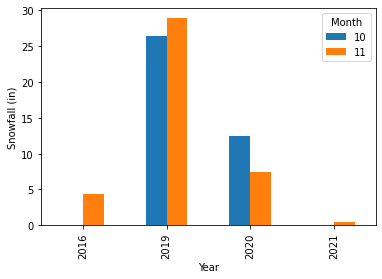

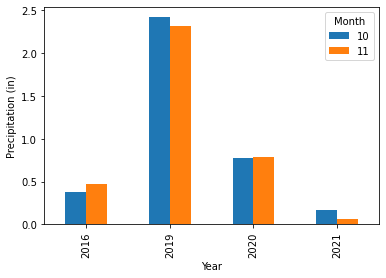

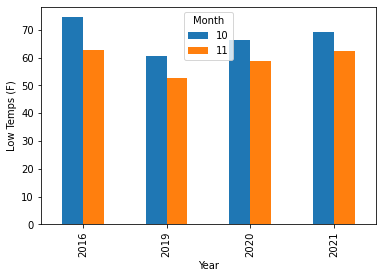

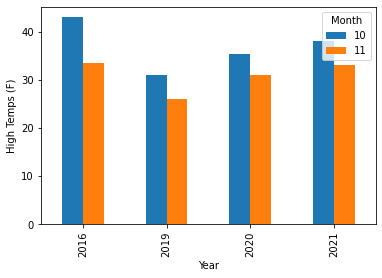

In [7]:
#boco_4yr['Day'] = list(map(lambda x: x.day, boco_4yr.index))
boco_4yr['Month'] = list(map(lambda x: x.month, boco_4yr.index))
boco_4yr['Year'] = list(map(lambda x: x.year, boco_4yr.index))

boco_4yr_snw = boco_4yr.groupby(['Month','Year']).sum().unstack().T
boco_4yr_snw = boco_4yr_snw.loc['SNOW']

boco_4yr_pcp = boco_4yr.groupby(['Month','Year']).sum().unstack().T
boco_4yr_pcp = boco_4yr_pcp.loc['PRCP']

boco_4yr_low = boco_4yr.groupby(['Month','Year']).mean().unstack().T
boco_4yr_low = boco_4yr_low.loc['TMAX']

boco_4yr_hi = boco_4yr.groupby(['Month','Year']).mean().unstack().T
boco_4yr_hi = boco_4yr_hi.loc['TMIN']

ax_sn = boco_4yr_snw.plot(kind='bar')
ax_sn = ax_sn.set_ylabel('Snowfall (in)')
ax_pcp = boco_4yr_pcp.plot(kind='bar')
ax_pcp = ax_pcp.set_ylabel('Precipitation (in)')
ax_low = boco_4yr_low.plot(kind='bar')
ax_low = ax_low.set_ylabel('Low Temps (F)')
ax_hi = boco_4yr_hi.plot(kind='bar')
ax_hi = ax_hi.set_ylabel('High Temps (F)')

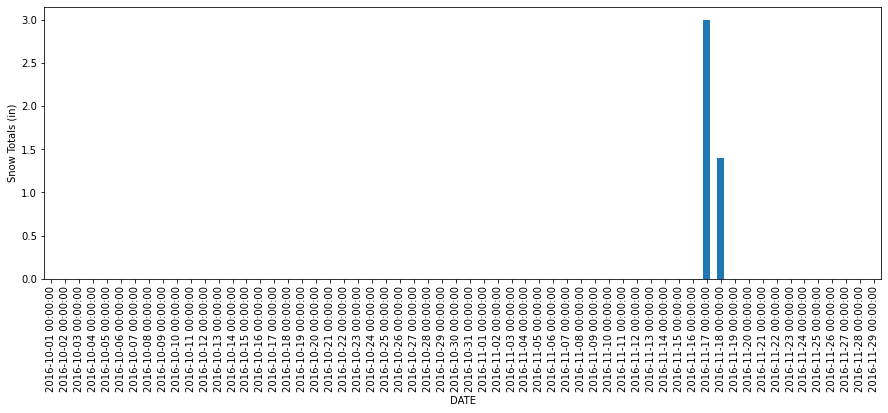

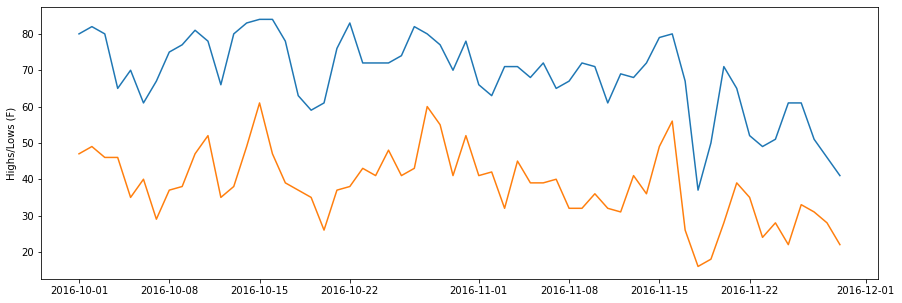

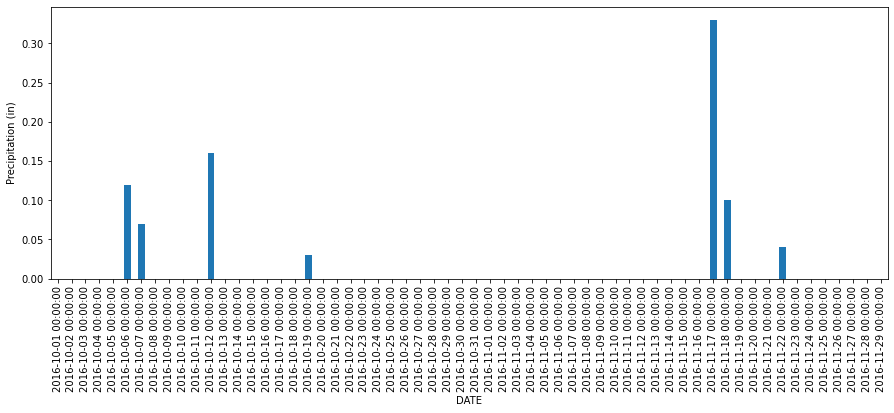

In [8]:
snow_2016 = boco_2016['SNOW'].T
highs_2016 = boco_2016['TMAX'].T
lows_2016 = boco_2016['TMIN'].T
pcp_2016 = boco_2016['PRCP'].T

import matplotlib.pyplot as plt

fig1 = plt.figure(figsize=(15,5))
ax_sn = snow_2016.plot(kind='bar')
ax_sn = ax_sn.set_ylabel("Snow Totals (in)")

fig2 = plt.figure(figsize=(15,5))
ax_temp = fig2.add_subplot()
ax_temp.plot(highs_2016)
ax_temp.plot(lows_2016)
ax_temp = ax_temp.set_ylabel('Highs/Lows (F)')

fig3 = plt.figure(figsize=(15,5))
ax_pcp = pcp_2016.plot(kind='bar')
ax_pcp = ax_pcp.set_ylabel("Precipitation (in)")

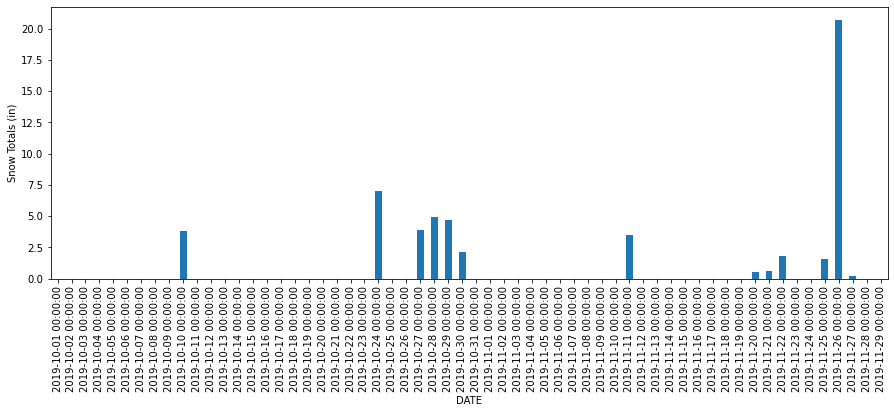

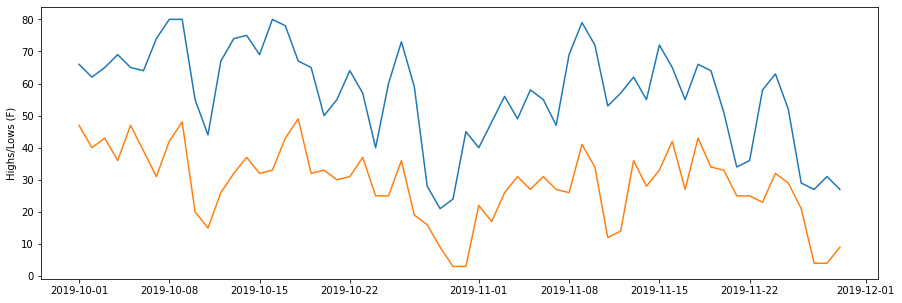

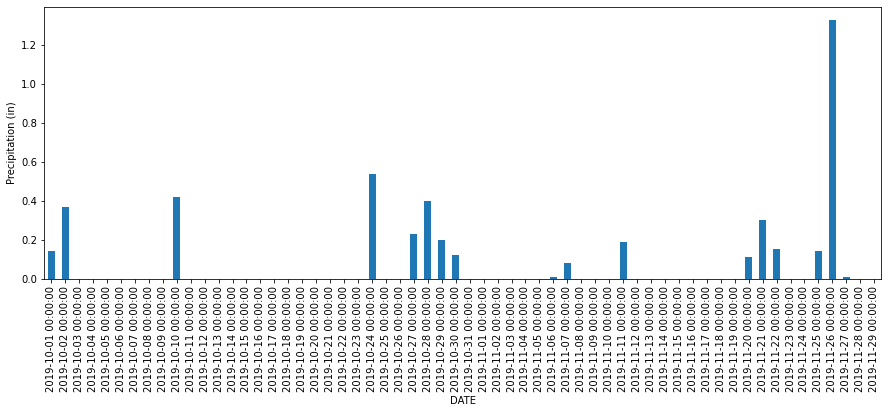

In [9]:
snow_2019 = boco_2019['SNOW'].T
highs_2019 = boco_2019['TMAX'].T
lows_2019 = boco_2019['TMIN'].T
pcp_2019 = boco_2019['PRCP'].T

import matplotlib.pyplot as plt

fig1 = plt.figure(figsize=(15,5))
ax_sn = snow_2019.plot(kind='bar')
ax_sn = ax_sn.set_ylabel("Snow Totals (in)")

fig2 = plt.figure(figsize=(15,5))
ax_temp = fig2.add_subplot()
ax_temp.plot(highs_2019)
ax_temp.plot(lows_2019)
ax_temp = ax_temp.set_ylabel('Highs/Lows (F)')

fig3 = plt.figure(figsize=(15,5))
ax_pcp = pcp_2019.plot(kind='bar')
ax_pcp = ax_pcp.set_ylabel("Precipitation (in)")

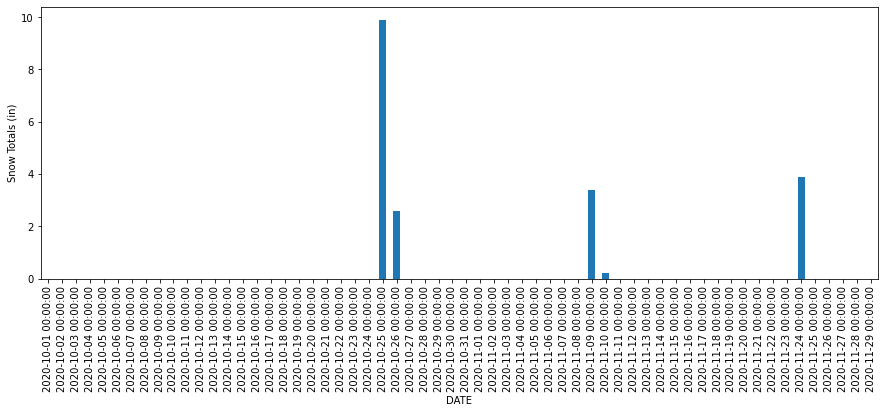

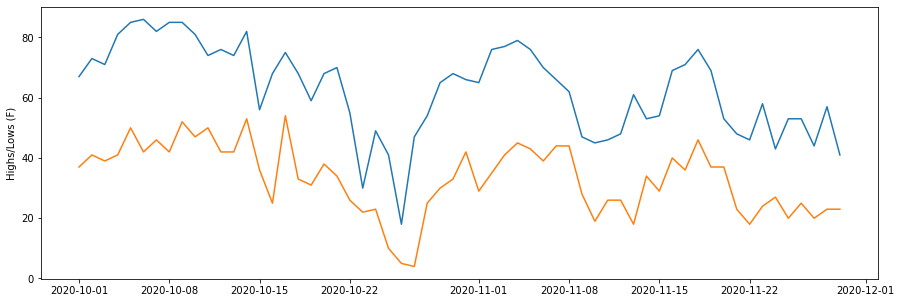

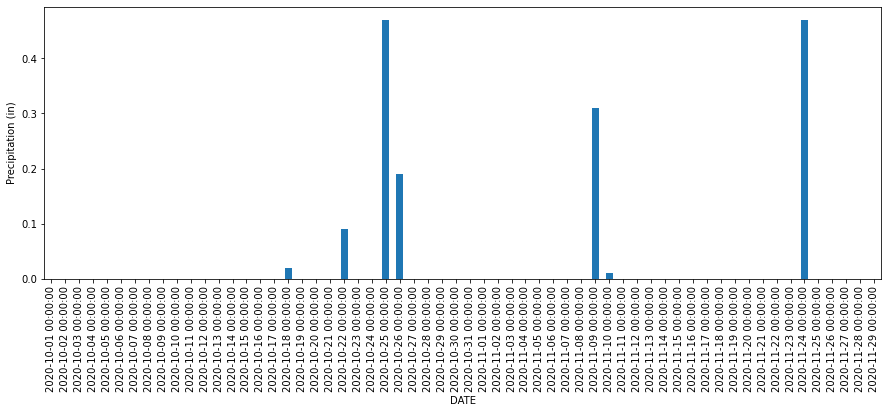

In [10]:
snow_2020 = boco_2020['SNOW'].T
highs_2020 = boco_2020['TMAX'].T
lows_2020 = boco_2020['TMIN'].T
pcp_2020 = boco_2020['PRCP'].T

import matplotlib.pyplot as plt

fig1 = plt.figure(figsize=(15,5))
ax_sn = snow_2020.plot(kind='bar')
ax_sn = ax_sn.set_ylabel("Snow Totals (in)")

fig2 = plt.figure(figsize=(15,5))
ax_temp = fig2.add_subplot()
ax_temp.plot(highs_2020)
ax_temp.plot(lows_2020)
ax_temp = ax_temp.set_ylabel('Highs/Lows (F)')

fig3 = plt.figure(figsize=(15,5))
ax_pcp = pcp_2020.plot(kind='bar')
ax_pcp = ax_pcp.set_ylabel("Precipitation (in)")

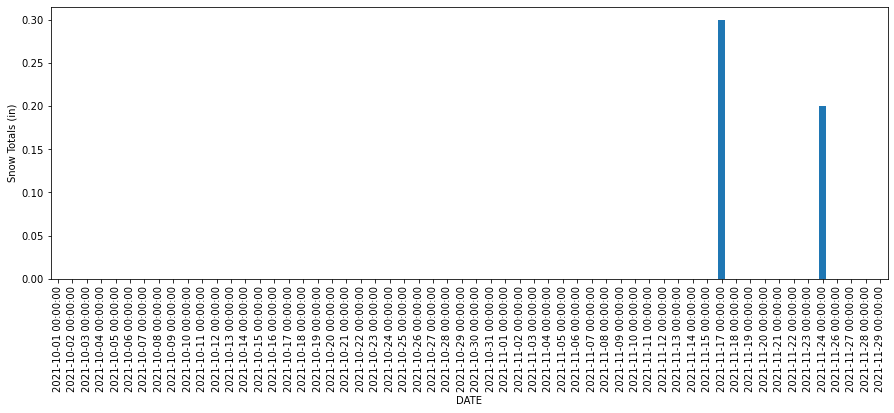

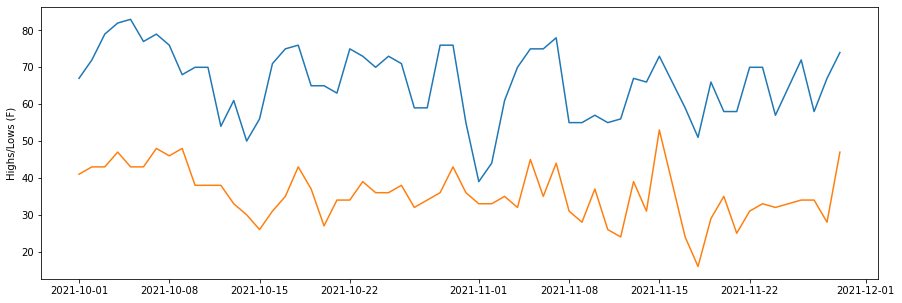

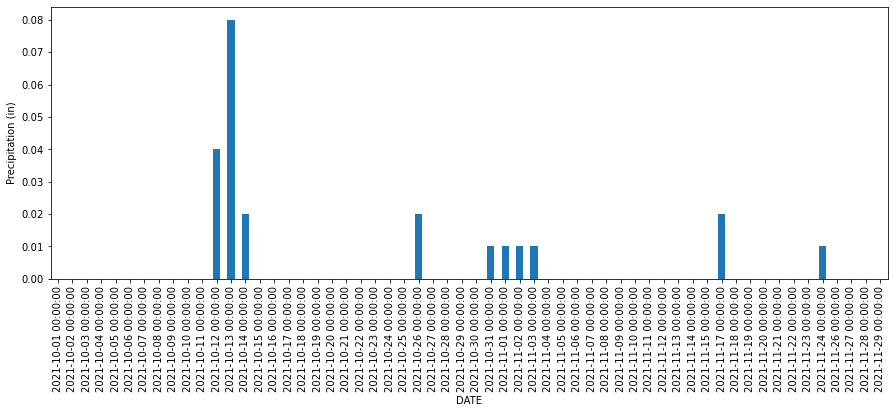

In [11]:
snow_2021 = boco_2021['SNOW'].T
highs_2021 = boco_2021['TMAX'].T
lows_2021 = boco_2021['TMIN'].T
pcp_2021 = boco_2021['PRCP'].T

import matplotlib.pyplot as plt

fig1 = plt.figure(figsize=(15,5))
ax_sn = snow_2021.plot(kind='bar')
ax_sn = ax_sn.set_ylabel("Snow Totals (in)")

fig2 = plt.figure(figsize=(15,5))
ax_temp = fig2.add_subplot()
ax_temp.plot(highs_2021)
ax_temp.plot(lows_2021)
ax_temp = ax_temp.set_ylabel('Highs/Lows (F)')

fig3 = plt.figure(figsize=(15,5))
ax_pcp = pcp_2021.plot(kind='bar')
ax_pcp = ax_pcp.set_ylabel("Precipitation (in)")